In [1]:
import torch

C:\Users\User\anaconda3\envs\yolov5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5-master/runs/train/exp3/weights/best.pt')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-31 Python-3.10.0 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3080, 10239MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients
Adding AutoShape... 


In [3]:
import os

In [4]:
eva_dir = r'Evaluation_Dataset'
files = os.listdir(eva_dir)

In [5]:
results={}
i=0

for f in files:
    fullpath = eva_dir+'/'+f
    results[i] = model(fullpath)
    i=i+1
    

In [6]:
results

{0: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 1586x3034 2 1s
 Speed: 98.2ms pre-process, 3264.4ms inference, 40.3ms NMS per image at shape (1, 3, 352, 640),
 1: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 1586x3034 2 2s
 Speed: 81.1ms pre-process, 6.8ms inference, 2.0ms NMS per image at shape (1, 3, 352, 640),
 2: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 1921x2904 5 2s
 Speed: 81.1ms pre-process, 13.7ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640),
 3: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 2154x2759 5 4s
 Speed: 102.5ms pre-process, 10.7ms inference, 2.9ms NMS per image at shape (1, 3, 512, 640),
 4: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 2159x2775 5 3s
 Speed: 160.5ms pre-process, 7.8ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640),
 5: YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 2016x2240 5 0s
 Speed: 163.1ms pre-process, 12.7ms infe

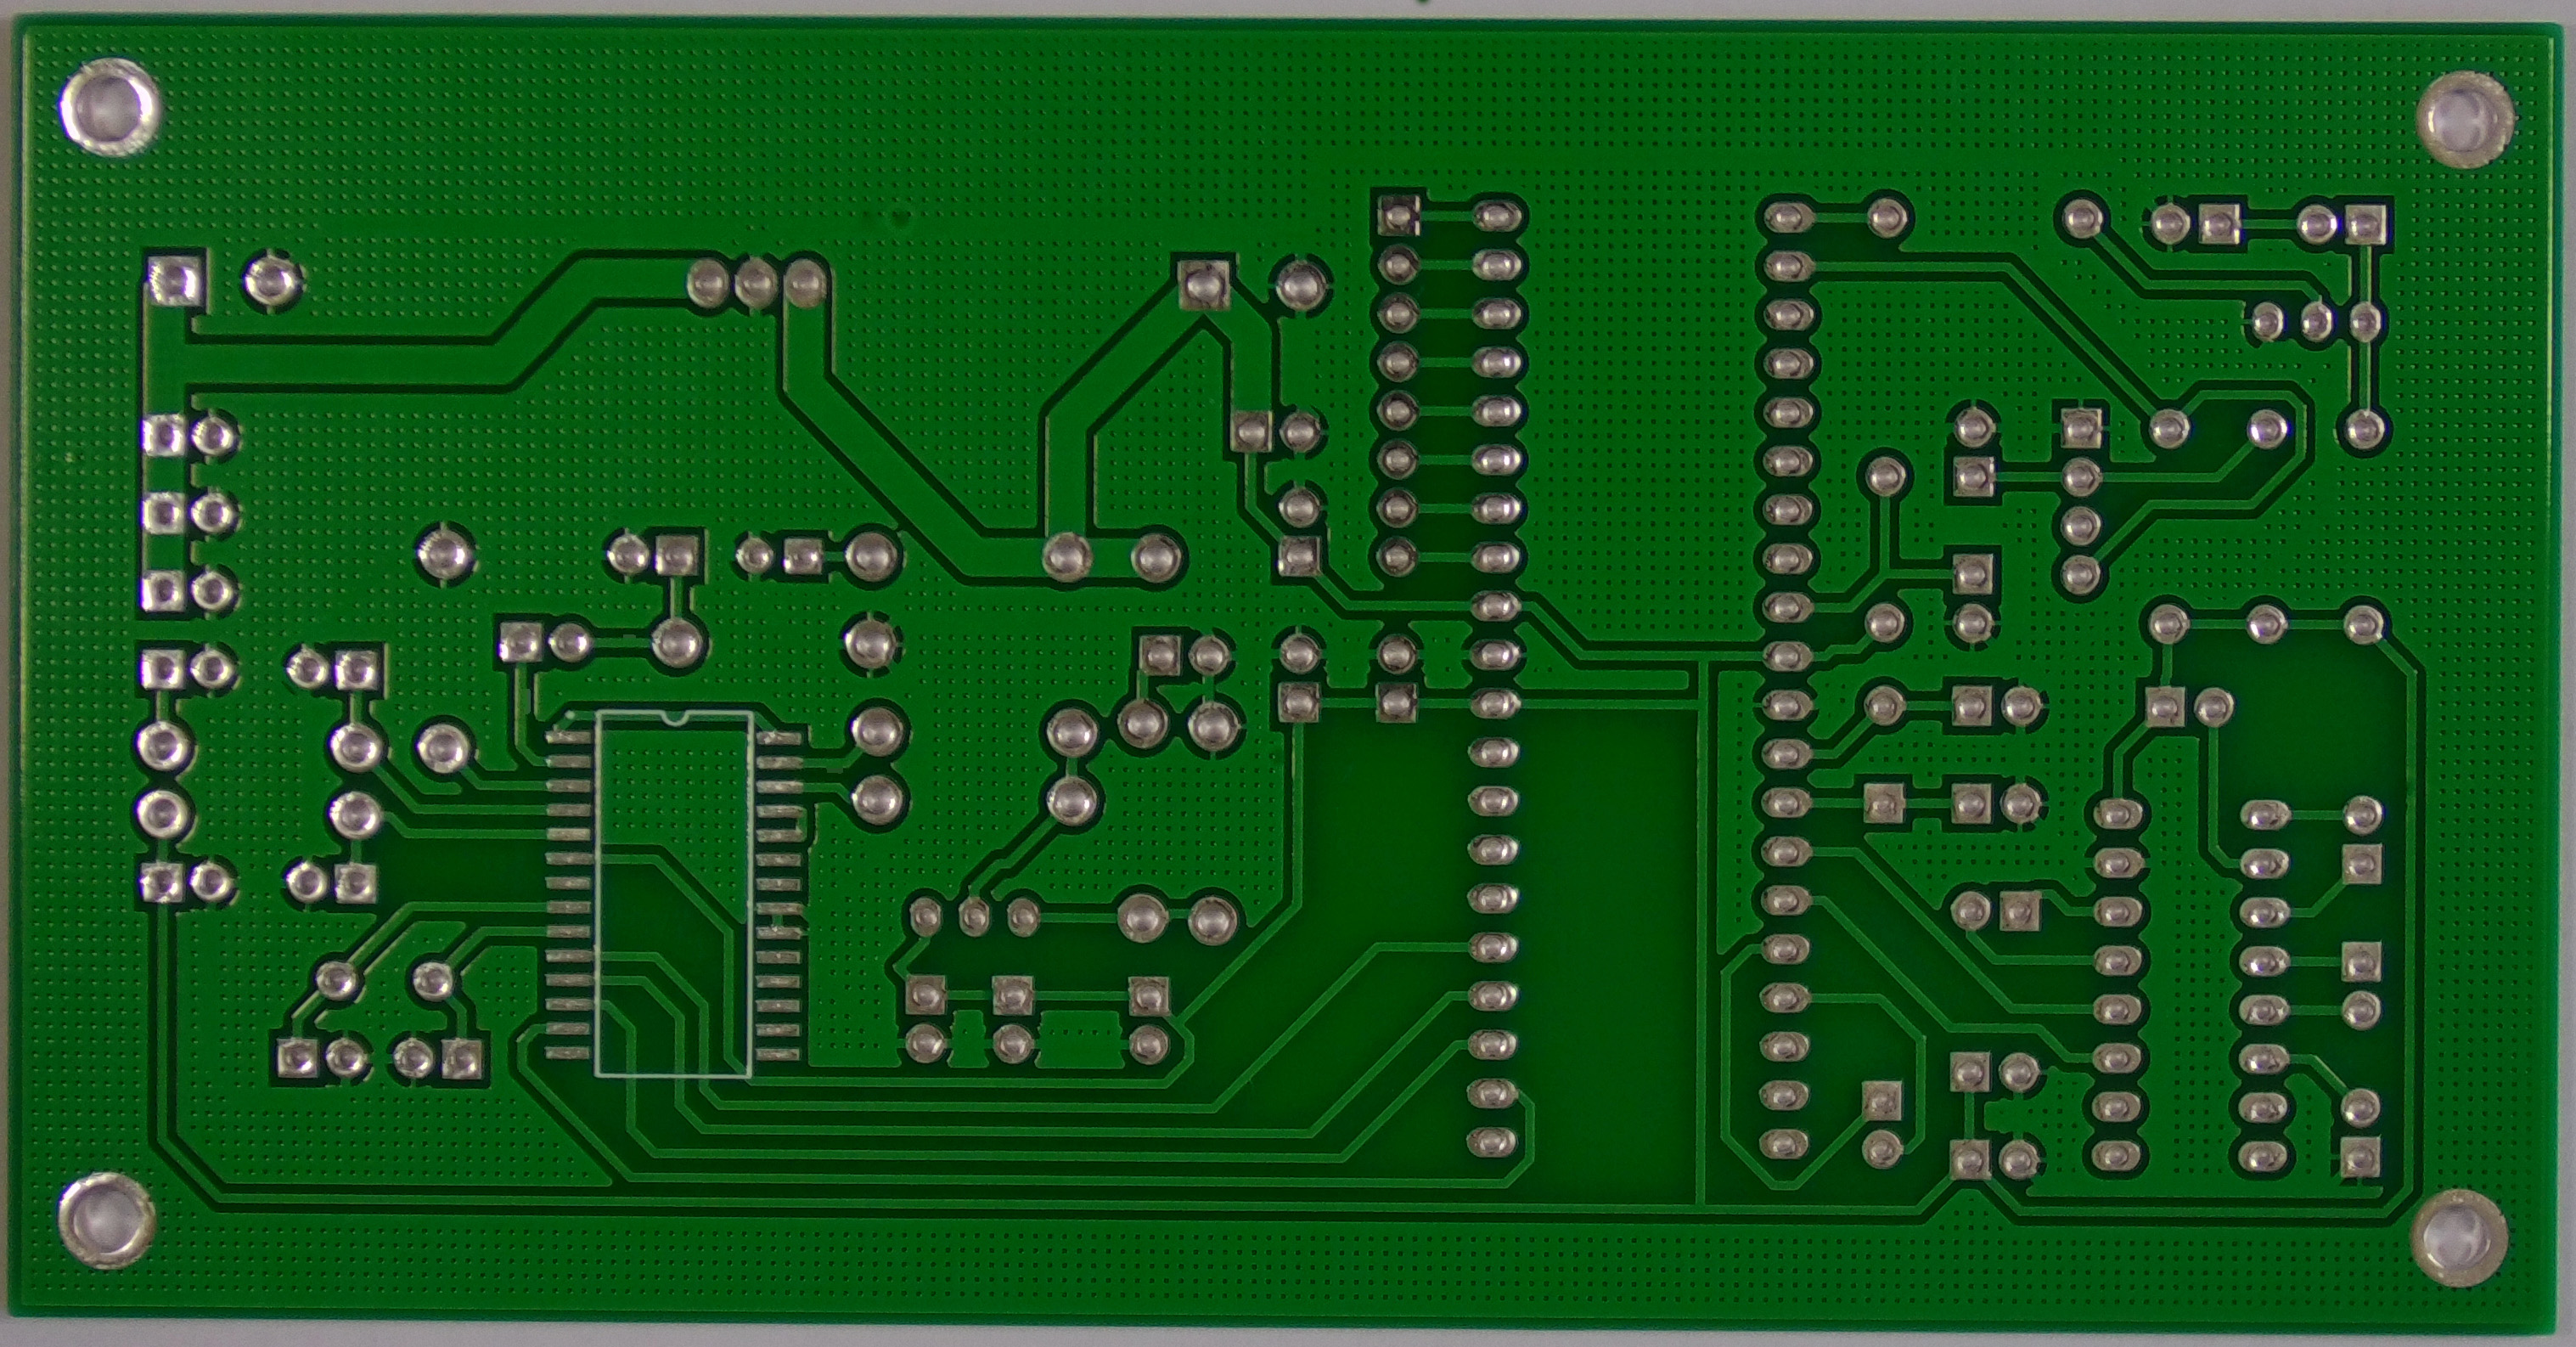

In [7]:
results[18].show() #4.jpg(no detections)

In [8]:
def txtdata1(pred):
    pred = pred.pandas().xyxy[0]
    pred = pred.loc[:,['class','xmin','ymin','xmax','ymax']]
    pred = pred.values.tolist()
    for num1 in range(len(pred)):
        for num2 in range(5):
            pred[num1][num2]=int(pred[num1][num2])
    pred = ",".join('%s' %id for id in pred) 
    pred = pred.replace('[', '')
    pred = pred.replace(']', '')
    pred = pred.replace(' ', '')
    
    return pred

In [9]:
def txtdata2(pred):
    pred = pred.pandas().xyxy[0]
    pred = pred.loc[:,['class','xmin','ymin','xmax','ymax']]
    pred = pred.values.tolist()
    for num1 in range(len(pred)):
        for num2 in range(5):
            pred[num1][num2]=int(pred[num1][num2])
        pred[num1][3]=pred[num1][3]-pred[num1][1]
        pred[num1][4]=pred[num1][4]-pred[num1][2]
    pred = ",".join('%s' %id for id in pred) 
    pred = pred.replace('[', '')
    pred = pred.replace(']', '')
    pred = pred.replace(' ', '')
    
    return pred

In [10]:
f = open('output.txt','w')
f.write('ImageName,Label,Locations\n')
for j in range(len(files)):
    pred = txtdata1(results[j])
    f.write(files[j]+','+pred+'\n')
f.close()

In [11]:
#f = open('s1096024.txt','w')
#f.write('ImageName,Label,Locations\n')
#for j in range(len(files)):
    #pred = txtdata2(results[j])
    #f.write(files[j]+','+pred+'\n')
#f.close()